![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## SVM

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) jest algorytmem regresji i klasyfikacji, który jest zbliżony do metod liniowych, ale może wykorzystywać funkcje jądrowe (kernel functions) do mapowania zależności nieliniowych, do przestrzeni liniowej. Takie rozwiązanie nazywa się trikiem jądrowym ([kernel trick](https://en.wikipedia.org/wiki/Kernel_method)). 

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png)

W tym przykładzie skupimy się na regresji używając SVM.

Wygenerujmy najpierw nielinowe dane.

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Dane przykładowe w postaci sinusa z szumem
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

Nauczmy teraz modele SVM z różnymi funkcjami jądrowymi.

In [2]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Możemy wyniki przedstawić na wspólnym wykresie.

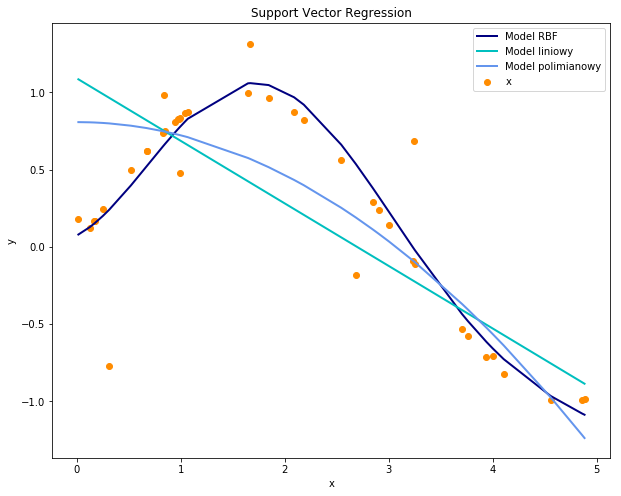

In [3]:
lw = 2
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='darkorange', label='x')
plt.plot(X, y_rbf, color='navy', lw=lw, label='Model RBF')
plt.plot(X, y_lin, color='c', lw=lw, label='Model liniowy')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Model polimianowy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Zadanie

1. Wykorzystaj model liniowy SVM do przykładu z cukrzycą; czy jest lepszy?
1. Wykorzystaj model nieliniowy SVM do przykładu z cukrzycą; czy jest lepszy?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

# Zbiór danych
diabetes = datasets.load_diabetes()


import pandas as pd

dia_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)\
    .assign(target=diabetes.target)
    
dia_df.head()

def tworzmodelsvmlin(df,zmienne,target_col='target'):
    df_train = df.iloc[:-20, :]
    df_test = df.iloc[:-20, :]
    m = SVR(kernel='linear',C=1e3)
    m.fit(df_train[zmienne], df_train[target_col])
    pred = m.predict(df_test[zmienne])
   # print('Współczynniki: \n', m.coef_)
    print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(df_test[target_col], pred))
    print('Metryka R2 (wariancji): %.2f' % r2_score(df_test[target_col], pred))
    return m

tworzmodelsvmlin(dia_df,['age', 'sex', 'bmi','bp'])


def tworzmodelsvm(df,zmienne,target_col='target'):
    df_train = df.iloc[:-20, :]
    df_test = df.iloc[:-20, :]
    m = SVR(kernel='rbf',C=1e3,gamma=0.1)
    m.fit(df_train[zmienne], df_train[target_col])
    pred = m.predict(df_test[zmienne])
   # print('Współczynniki: \n', m.coef_)
    print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(df_test[target_col], pred))
    print('Metryka R2 (wariancji): %.2f' % r2_score(df_test[target_col], pred))
    return m

#tworzmodelsvm(dia_df,['age', 'sex', 'bmi','bp'])

NameError: name 'SVR' is not defined